# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [1]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


###  Import Statements


In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Statistics model, train test split and metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

## Notebook Presentation

In [3]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data

In [4]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

***Key Variables***
  1. S: Years of schooling (highest grade completed as of 2011).
  2. EXP: Total out-of-school work experience (years) as of the 2011 interview.
  3. EARNINGS: Current hourly earnings in $ reported at the 2011 interview.

***Other work-related variables***

* HOURS: Usual number of hours worked per week, 2011 interview.
* TENURE: Tenure (years) with current employer at the 2011 interview.
* COLLBARG: Pay set by collective bargaining, 2011.
* JOBS: Number of jobs, as of 2011 interview.

# 🔎 Preliminary Data Exploration

In [5]:
df_data.shape

(2000, 96)

* Dataset has 2000 rows and 96 columns.

In [6]:
df_data.columns

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [7]:
df_data.isna().any().sum()

16

* There are 16 NaN values.

In [8]:
df_data.duplicated().sum()

513

* There are 513 duplicated values.

In [9]:
df = df_data.dropna()
df = df.drop_duplicates()
print(df.isna().any().sum())
df.duplicated().sum()

0


0

In [10]:
df.columns = df.columns.str.lower()
df.head()

,id,earnings,s,exp,female,male,byear,age,agembth,hhinc97,povrat97,hhbmbf,hhbmof,hhombf,hhbmonly,hhbfonly,hhother,msa97no,msa97ncc,msa97cc,msa97nk,ethblack,ethhisp,ethwhite,educprof,educphd,educmast,educba,educaa,educhsd,educged,educdo,prmonm,prmonf,prmstyun,prmstype,prmstyan,prmstyae,prfstyun,prfstype,prfstyan,prfstyae,single,married,cohabit,othsing,faithn,faithp,faithc,faithj,faitho,faithm,asvabar,asvabwk,asvabpc,asvabmk,asvabno,asvabcs,asvabc,asvabc4,verbal,asvabmv,height,weight04,weight11,sf,sm,sfr,smr,siblings,reg97ne,reg97nc,reg97s,reg97w,rs97rurl,rs97urbn,rs97unkn,jobs,hours,tenure,catgov,catpri,catnpo,catmis,catse,collbarg,urban,regne,regnc,regw,regs,msa11no,msa11ncc,msa11cc,msa11nk,msa11nic
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",402.00,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,14.00,14.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0,1,0,0,0,0,1,0,0,0,0.12,-0.69,-0.31,-0.29,-0.36,-0.72,-0.21,-0.32,-0.53,29818,70,155,186,12,12,12.00,12.00,1,0,0,1,0,0,1,0,6.00,50,4.77,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",278.00,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,11.00,8.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1,0,0,0,0,0,0,1,0,0,1.54,0.33,0.78,1.19,0.22,0.22,1.15,1.07,0.59,89773,71,145,170,14,16,14.00,16.00,1,0,0,0,1,0,1,0,7.00,40,2.35,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
5,2788,13.14,12,8.02,0,1,1983,28,25.00,"97,400.00",612.00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,5.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0,0,1,0,0,1,0,0,0,0,0.72,1.01,0.80,1.11,-0.76,0.69,0.90,1.02,0.97,86885,66,220,245,13,13,13.00,13.00,1,0,1,0,0,1,0,0,2.00,50,4.25,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
6,3473,10.00,13,9.79,0,1,1983,28,23.00,"70,751.00",445.00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,3.00,5.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1,0,0,0,0,1,0,0,0,0,-2.59,-0.68,-1.61,-0.93,-1.31,-0.01,-2.05,-1.62,-1.22,8396,69,154,150,12,16,12.00,16.00,1,0,0,1,0,0,1,0,3.00,30,8.08,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
8,1239,20.19,14,6.85,0,1,1983,28,25.00,"246,474.00","1,627.00",1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,10.00,6.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0,1,0,0,0,1,0,0,0,0,1.86,1.69,2.24,1.09,0.87,0.56,2.10,1.93,2.10,98479,71,175,180,16,20,16.00,20.00,1,0,1,0,0,0,1,0,6.00,40,3.88,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


## Descriptive Statistics

In [11]:
df.describe(include='all')

,id,earnings,s,exp,female,male,byear,age,agembth,hhinc97,povrat97,hhbmbf,hhbmof,hhombf,hhbmonly,hhbfonly,hhother,msa97no,msa97ncc,msa97cc,msa97nk,ethblack,ethhisp,ethwhite,educprof,educphd,educmast,educba,educaa,educhsd,educged,educdo,prmonm,prmonf,prmstyun,prmstype,prmstyan,prmstyae,prfstyun,prfstype,prfstyan,prfstyae,single,married,cohabit,othsing,faithn,faithp,faithc,faithj,faitho,faithm,asvabar,asvabwk,asvabpc,asvabmk,asvabno,asvabcs,asvabc,asvabc4,verbal,asvabmv,height,weight04,weight11,sf,sm,sfr,smr,siblings,reg97ne,reg97nc,reg97s,reg97w,rs97rurl,rs97urbn,rs97unkn,jobs,hours,tenure,catgov,catpri,catnpo,catmis,catse,collbarg,urban,regne,regnc,regw,regs,msa11no,msa11ncc,msa11cc,msa11nk,msa11nic
count,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00
mean,"3,530.57",19.13,14.89,5.92,0.49,0.51,"1,982.98",28.02,26.74,"66,732.78",403.47,0.89,0.09,0.02,0.00,0.00,0.00,0.21,0.55,0.23,0.00,0.07,0.10,0.83,0.02,0.00,0.09,0.36,0.08,0.37,0.06,0.03,10.05,7.56,0.14,0.38,0.14,0.34,0.15,0.33,0.19,0.32,0.36,0.41,0.17,0.05,0.02,0.60,0.35,0.01,0.02,0.01,0.33,0.26,0.26,0.30,0.17,0.24,0.32,0.32,0.28,"60,033.84",68.03,164.29,177.98,13.71,13.59,13.84,13.57,1.96,0.15,0.36,0.29,0.19,0.32,0.68,0.00,5.32,39.87,3.37,0.13,0.74,0.08,0.05,0.06,0.12,0.75,0.13,0.31,0.35,0.21,0.05,0.54,0.41,0.00,0.00
std,"1,948.08",11.54,2.69,2.51,0.50,0.50,0.82,0.82,4.71,"44,951.87",306.14,0.32,0.29,0.14,0.00,0.00,0.05,0.41,0.50,0.42,0.00,0.26,0.29,0.37,0.13,0.05,0.29,0.48,0.27,0.48,0.23,0.17,2.95,3.61,0.35,0.49,0.35,0.47,0.36,0.47,0.40,0.47,0.48,0.49,0.38,0.23,0.14,0.49,0.48,0.10,0.14,0.08,0.88,0.84,0.92,0.88,0.93,0.90,0.87,0.86,0.88,"26,528.00",4.16,39.41,46.16,2.92,2.55,2.89,2.55,1.44,0.36,0.48,0.45,0.40,0.47,0.47,0.00,2.82,10.49,2.30,0.34,0.44,0.27,0.22,0.24,0.33,0.44,0.33,0.46,0.48,0.41,0.22,0.50,0.49,0.05,0.00
min,28.00,2.13,8.00,0.00,0.00,0.00,"1,982.00",27.00,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-2.59,-2.45,-2.12,-2.42,-3.87,-3.77,-2.43,-2.31,-2.31,281.00,59.00,96.00,95.00,4.00,4.00,4.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,10.00,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,833.25",12.00,12.00,4.24,0.00,0.00,"1,982.00",27.00,24.00,"40,725.00",223.75,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.15,-0.36,-0.31,-0.24,-0.41,-0.38,-0.17,-0.18,-0.32,"41,179.50",64.00,135.00,141.50,12.00,12.00,12.00,12.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,40.00,1.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,470.50",16.00,16.00,5.75,0.00,1.00,"1,983.00",28.00,26.00,"58,027.50",333.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.37,0.38,0.30,0.36,0.21,0.26,0.36,0.39,0.35,"63,057.00",68.00,158.00,170.00,13.00,13.00,14.00,13.00,2.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,5.00,40.00,3.15,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5

## Visualise the Features

In [12]:
df.head()

,id,earnings,s,exp,female,male,byear,age,agembth,hhinc97,povrat97,hhbmbf,hhbmof,hhombf,hhbmonly,hhbfonly,hhother,msa97no,msa97ncc,msa97cc,msa97nk,ethblack,ethhisp,ethwhite,educprof,educphd,educmast,educba,educaa,educhsd,educged,educdo,prmonm,prmonf,prmstyun,prmstype,prmstyan,prmstyae,prfstyun,prfstype,prfstyan,prfstyae,single,married,cohabit,othsing,faithn,faithp,faithc,faithj,faitho,faithm,asvabar,asvabwk,asvabpc,asvabmk,asvabno,asvabcs,asvabc,asvabc4,verbal,asvabmv,height,weight04,weight11,sf,sm,sfr,smr,siblings,reg97ne,reg97nc,reg97s,reg97w,rs97rurl,rs97urbn,rs97unkn,jobs,hours,tenure,catgov,catpri,catnpo,catmis,catse,collbarg,urban,regne,regnc,regw,regs,msa11no,msa11ncc,msa11cc,msa11nk,msa11nic
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",402.00,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,14.00,14.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0,1,0,0,0,0,1,0,0,0,0.12,-0.69,-0.31,-0.29,-0.36,-0.72,-0.21,-0.32,-0.53,29818,70,155,186,12,12,12.00,12.00,1,0,0,1,0,0,1,0,6.00,50,4.77,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",278.00,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,11.00,8.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1,0,0,0,0,0,0,1,0,0,1.54,0.33,0.78,1.19,0.22,0.22,1.15,1.07,0.59,89773,71,145,170,14,16,14.00,16.00,1,0,0,0,1,0,1,0,7.00,40,2.35,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
5,2788,13.14,12,8.02,0,1,1983,28,25.00,"97,400.00",612.00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,5.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0,0,1,0,0,1,0,0,0,0,0.72,1.01,0.80,1.11,-0.76,0.69,0.90,1.02,0.97,86885,66,220,245,13,13,13.00,13.00,1,0,1,0,0,1,0,0,2.00,50,4.25,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
6,3473,10.00,13,9.79,0,1,1983,28,23.00,"70,751.00",445.00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,3.00,5.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1,0,0,0,0,1,0,0,0,0,-2.59,-0.68,-1.61,-0.93,-1.31,-0.01,-2.05,-1.62,-1.22,8396,69,154,150,12,16,12.00,16.00,1,0,0,1,0,0,1,0,3.00,30,8.08,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
8,1239,20.19,14,6.85,0,1,1983,28,25.00,"246,474.00","1,627.00",1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,10.00,6.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0,1,0,0,0,1,0,0,0,0,1.86,1.69,2.24,1.09,0.87,0.56,2.10,1.93,2.10,98479,71,175,180,16,20,16.00,20.00,1,0,1,0,0,0,1,0,6.00,40,3.88,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


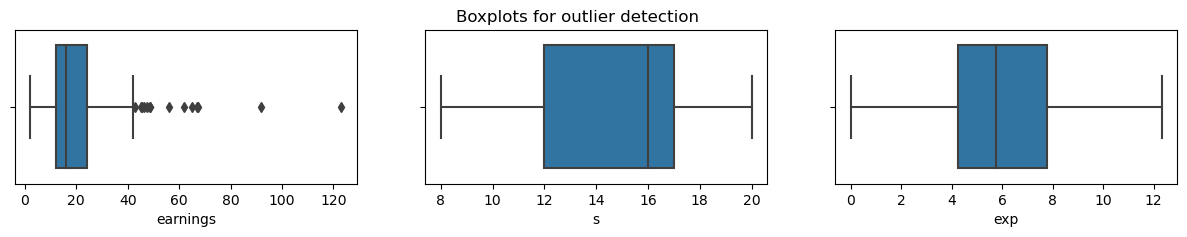

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df['earnings'])
sns.boxplot(ax=axes[1], x=df['s'])
sns.boxplot(ax=axes[2], x=df['exp'])
plt.show();

* There are outliers in `earnings`. We need to treat them properly later for linear regression to work well.

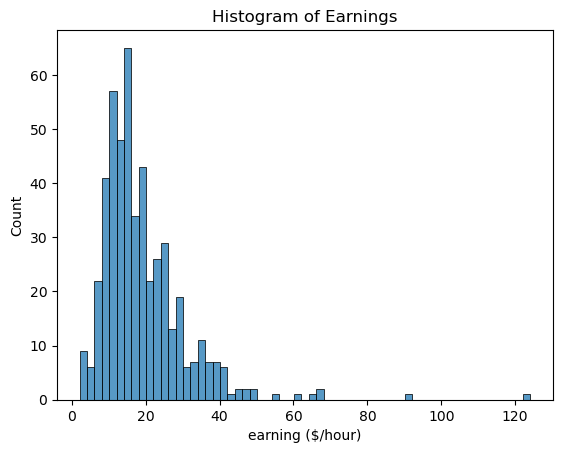

In [14]:
fig = sns.histplot(data=df['earnings'],
                   binwidth=2
                  )
fig.set_title('Histogram of Earnings')
fig.set_xlabel('earning ($/hour)')
plt.show()

* Most of earnings are distributed at 12-16 $/hour.

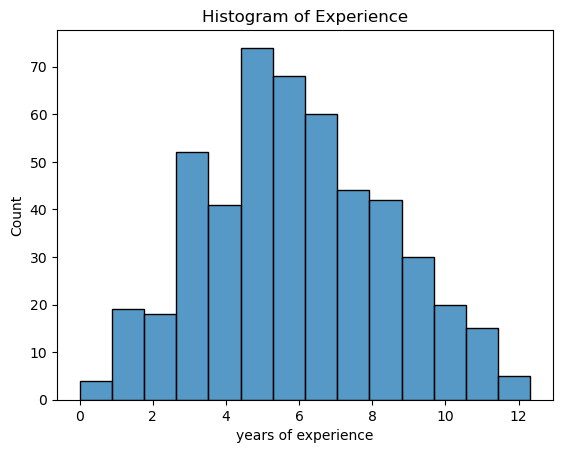

In [15]:
fig = sns.histplot(data=df['exp'])
fig.set_title('Histogram of Experience')
fig.set_xlabel('years of experience')
plt.show()

* Years of experience are distributed mostly at 5-7 years.

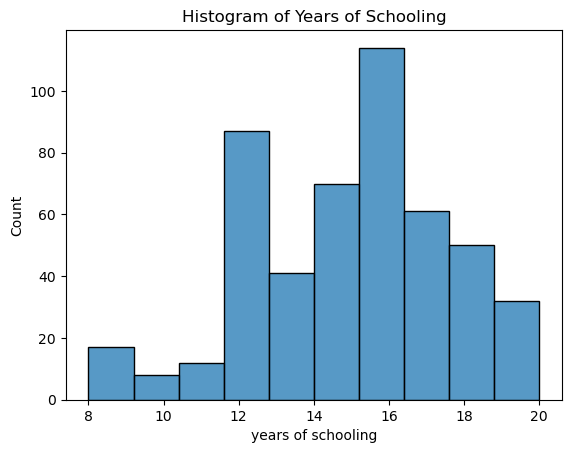

In [16]:
fig = sns.histplot(data=df['s'])
fig.set_title('Histogram of Years of Schooling')
fig.set_xlabel('years of schooling')
plt.show()

* 12-16 years of schooling are the most common categories.

# Outliers

Create a function to impute outliers.

In [17]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
        print()

In [18]:
# Impute the outliers with the upper threshold value
outlier_imputer(['earnings'], 1.5)

earnings
q3: 24.04
upper_threshold: 42.099999999999994
count   492.00
mean     18.59
std       9.18
min       2.13
25%      12.00
50%      16.00
75%      24.04
max      42.10
Name: earnings, dtype: float64



***Optional:*** Create a function to drop outliers (We don't use this in this project because the number of outliers is large in proportion to all data observations.

In [19]:
def outlier_drop(column_list, iqr_factor):
    for col in column_list:
        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df.drop(df[df[col] > upper_threshold].index, inplace=True)
        print(df[col].describe())
        print()

In [20]:
# Drop outliers
# outlier_drop(['earnings'], 1.5)

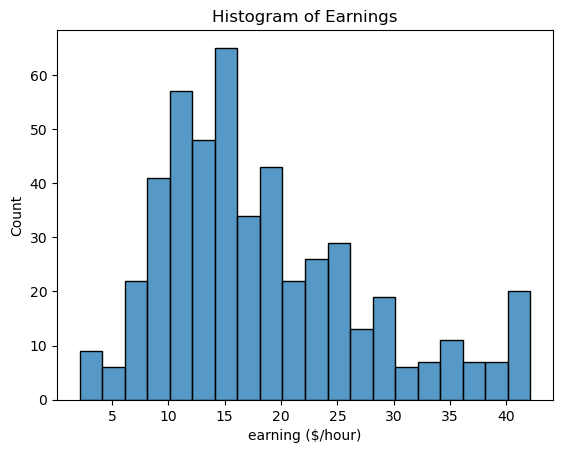

In [21]:
fig = sns.histplot(data=df['earnings'],
                   binwidth=2
                  )
fig.set_title('Histogram of Earnings')
fig.set_xlabel('earning ($/hour)')
plt.show()

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [22]:
y = df[['earnings']]
X = df.drop(['earnings'], axis=1)

In [23]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [24]:
# Fit your model to the training data
lr = LinearRegression()
lr.fit(X_train[['s']], y_train)

LinearRegression()

### Evaluate on Training Data

In [25]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train[['s']], y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train[['s']])
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.13444397225458282
R^2: 0.13444397225458282
MAE: 6.689740768037562
MSE: 76.0768122505329
RMSE: 8.722202259207986


* R-squared comes in around 0.134 meaning that our model explains about 13.4% variance in the earnings.

### Evaluate on Test Data

Calculate the same metrics on the test data.

In [26]:
# Evaluate the model performance on the test data
r_sq = lr.score(X_test[['s']], y_test)
print('Coefficient of determination:', r_sq)
y_pred_test = lr.predict(X_test[['s']])
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test, y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.025173557859799023
R^2: 0.025173557859799023
MAE: 6.274715327934066
MSE: 66.68805739044157
RMSE: 8.16627561318142


* R-squared comes in around 0.025 meaning that our model explains about 2.5% variance in the earnings.

### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [27]:
print('Intercept', lr.intercept_)
print('Coefficient', lr.coef_)

Intercept [-0.52914765]
Coefficient [[1.27260294]]


* If one has 0 year of schooling, the estimated earning is -0.53 dollars.
* For an additional year of schooling, one can expect to earn 1.27 extra dollars.

### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [28]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['earnings'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
248,18.45,14.74,3.71
192,14.95,14.74,0.21
863,19.83,22.38,-2.55
912,10.00,18.56,-8.56
212,36.15,22.38,13.77


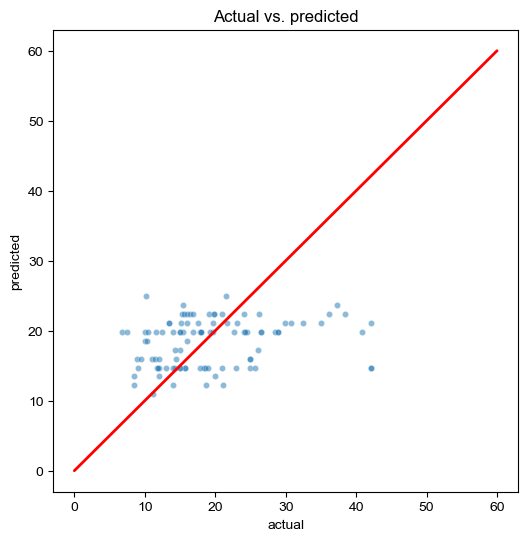

In [29]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

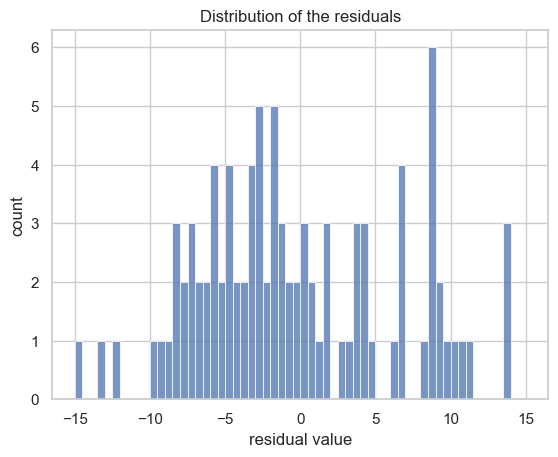

In [30]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [31]:
results['residual'].mean()

0.824635142407024

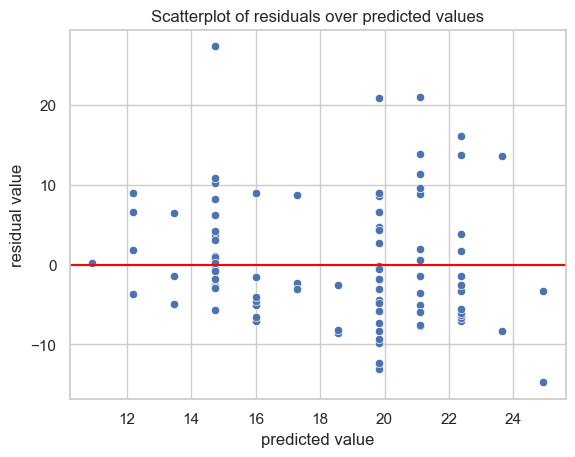

In [32]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [33]:
# Fit your model to the training data
lr = LinearRegression()
lr.fit(X_train[['s', 'exp']], y_train)

LinearRegression()

### Evaluate on Training Data

In [34]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train[['s', 'exp']], y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train[['s', 'exp']])
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.15379832704382956
R^2: 0.15379832704382956
MAE: 6.606233001237823
MSE: 74.37568884738701
RMSE: 8.624134092613994


* R-squared comes in 0.154 meaning that our model explains about 15.4% variance in the earnings.

### Evaluate on Test Data

Calculate the same metrics on the test data.

In [35]:
# Evaluate the model performance on the test data
r_sq = lr.score(X_test[['s', 'exp']], y_test)
print('Coefficient of determination:', r_sq)
y_pred_test = lr.predict(X_test[['s', 'exp']])
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test, y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.09933811116238811
R^2: 0.09933811116238811
MAE: 6.011908238759328
MSE: 61.614446567861734
RMSE: 7.849487025778291


* R-squared comes in around 0.1 meaning that our model explains about 10% variance in the earnings.

### Evaluate the Coefficients of the Model

In [36]:
print('Intercept', lr.intercept_)
print('Coefficient', lr.coef_)

Intercept [-10.9997048]
Coefficient [[1.70417559 0.68862426]]


* If one has 0 year of schooling and 0 year of work experience, the estimated earning is -11 dollars.
* For an additional year of schooling, one can expect to earn 1.7 extra dollars.
* For an additional year of work experience, one can expect to earn 0.69 extra dollars.

### Analyse the Estimated Values & Regression Residuals

In [37]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['earnings'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
248,18.45,15.87,2.58
192,14.95,12.26,2.69
863,19.83,23.25,-3.42
912,10.00,19.05,-9.05
212,36.15,21.57,14.58


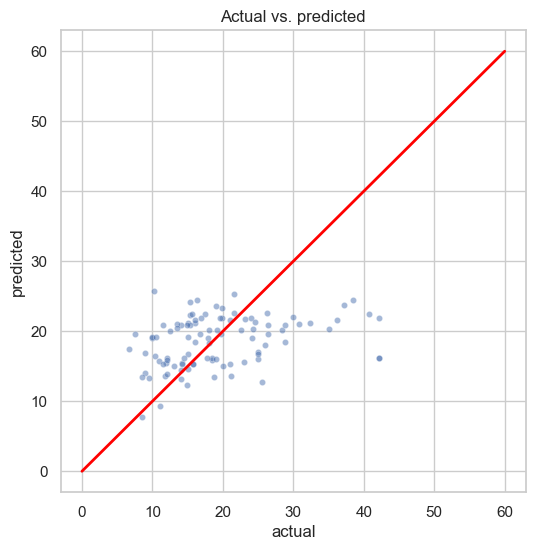

In [38]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

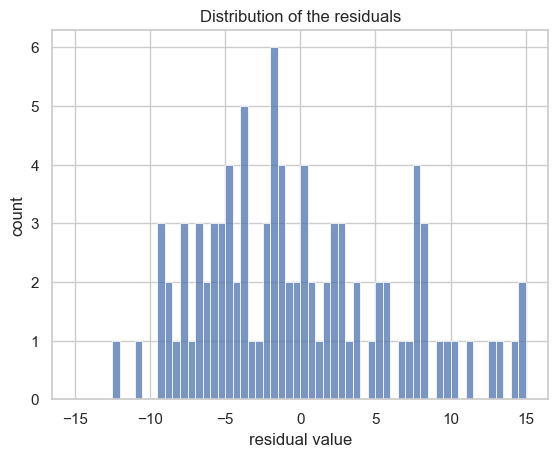

In [39]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [40]:
results['residual'].mean()

0.6637035343971511

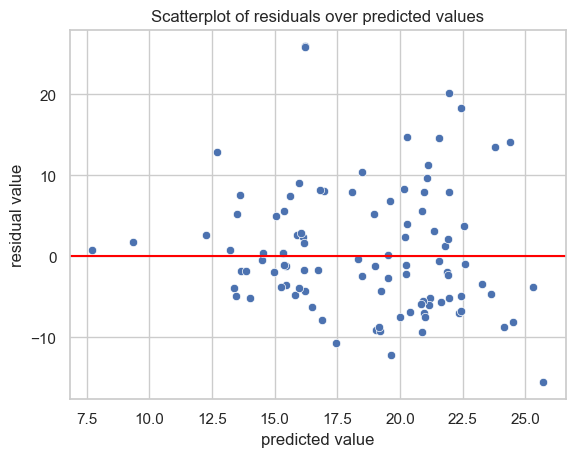

In [41]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

### Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [42]:
X_to_predict = pd.DataFrame(data={'s': [16],
                                  'exp': [5]})
y_to_predict = lr.predict(X_to_predict)
y_to_predict

array([[19.71022596]])

* With a bachelors degree (12 + 4) years of schooling and 5 years work experience, one can expect to earn 19.7 $/hour.

# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 

### Investigate more variables

Make a correlation heatmap.

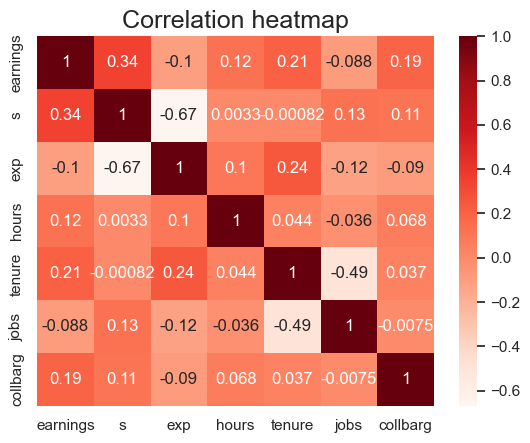

In [43]:
sns.heatmap(df[['earnings', 's', 'exp', 'hours', 'tenure', 'jobs', 'collbarg']].corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

* We'll try `s`, `tenure`, `hours`, and `collbarg`.
* As `tenure` and `exp` are correlated, but `exp` - `earnings` correlation score is -0.1 so we try testing by excluding `exp`.

In [44]:
# Fit your model to the training data
lr = LinearRegression()
lr.fit(X_train[['s', 'tenure', 'hours', 'collbarg']], y_train)

LinearRegression()

### Evaluate on Training Data

In [45]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train[['s', 'tenure', 'hours', 'collbarg']], y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train[['s', 'tenure', 'hours', 'collbarg']])
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.20649173665869702
R^2: 0.20649173665869702
MAE: 6.334154260520211
MSE: 69.74427678206688
RMSE: 8.351303897120909


* R-squared comes in 0.206 meaning that our model explains about 20,6% variance in the earnings.

### Evaluate on Test Data

Calculate the same metrics on the test data.

In [46]:
# Evaluate the model performance on the test data
r_sq = lr.score(X_test[['s', 'tenure', 'hours', 'collbarg']], y_test)
print('Coefficient of determination:', r_sq)
y_pred_test = lr.predict(X_test[['s', 'tenure', 'hours', 'collbarg']])
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test, y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.12389636481510724
R^2: 0.12389636481510724
MAE: 5.632665613837425
MSE: 59.93441188865674
RMSE: 7.741731840399584


* R-squared comes in around 0.124 meaning that our model explains about 12.4% variance in the earnings.

### Evaluate the Coefficients of the Model

In [47]:
print('Intercept', lr.intercept_)
print('Coefficient', lr.coef_)

Intercept [-5.27060657]
Coefficient [[1.2093429  0.75068794 0.06522635 4.67671127]]


* If one has 0 year of schooling, 0 year tenure, 0 hours worked per week, and pay not set by collective bargaining, the estimated earning is -5.27 dollars.
* For an additional year of schooling, one can expect to earn 1.21 extra dollars.
* For an additional year tenure, one can expect to earn 0.75 extra dollars.
* For an additional hour worked per week, one can expect to earn 0.06 extra dollars.
* If pay set by collective bargaining, one can expect to earning 4.67 extra dollars.

### Analyse the Estimated Values & Regression Residuals

In [48]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['earnings'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
248,18.45,12.75,5.70
192,14.95,14.85,0.10
863,19.83,28.56,-8.73
912,10.00,15.74,-5.74
212,36.15,23.71,12.44


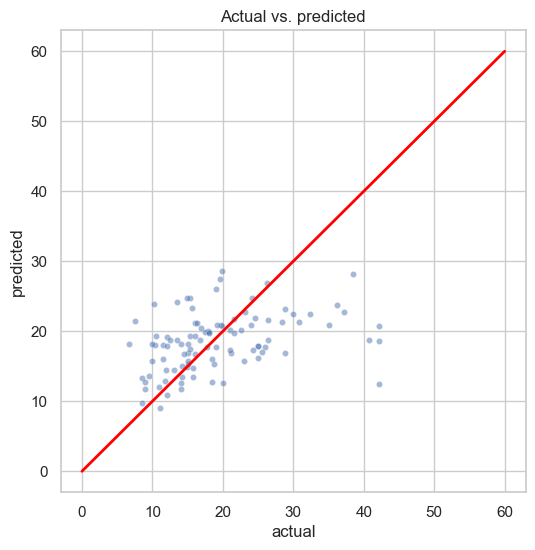

In [49]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

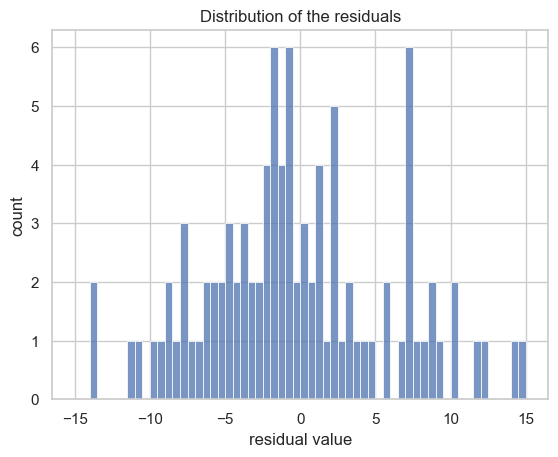

In [50]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [51]:
results['residual'].mean()

0.757242375004526

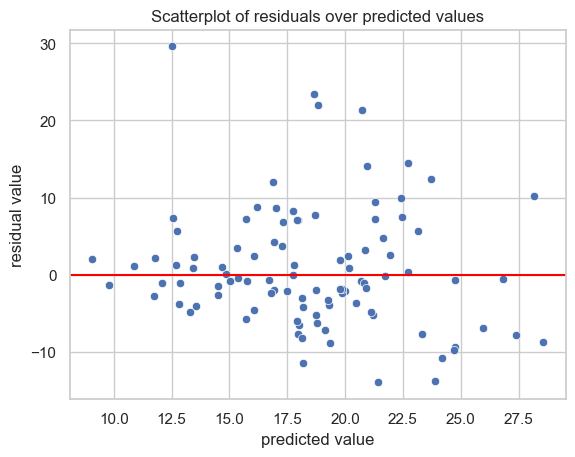

In [52]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

### Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling, 5 years tenure, 50 hours worked per week expect to earn in 2011?

In [53]:
X_to_predict = pd.DataFrame(data={'s': [16],
                                  'tenure': [5],
                                  'hours': [50],
                                  'collbarg': [1]})
y_to_predict = lr.predict(X_to_predict)
y_to_predict

array([[25.77034823]])

* With a bachelors degree (12 + 4) years of schooling, 5 years tenure, 50 hours worked per week, pay set by collective bargaining, one can expect to earn 25.77 $/hour.

# Build with all variables

In [54]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Evaluate on Training Data

In [55]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.4750137976080444
R^2: 0.4750137976080444
MAE: 5.2275276077903765
MSE: 46.14291331033312
RMSE: 6.792857521715962


* R-squared comes in around 0.475 meaning that our model explains about 47.5% variance in the earnings.

### Evaluate on Test Data

In [56]:
# Evaluate the model performance on the test data
r_sq = lr.score(X_test, y_test)
print('Coefficient of determination:', r_sq)
y_pred_test = lr.predict(X_test)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test, y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.18023098215256284
R^2: 0.18023098215256284
MAE: 5.626137146158714
MSE: 56.080550286564
RMSE: 7.488694831982674


* R-squared comes in around 0.18 meaning that our model explains about 18% variance in the earnings.

# Conclussion

* As we observed, with model using all variable, the r-squared score is 0.475 but it decreased significant to 0.18 after apply test data.
* With `s`, `tenure`, `hours`, the score decreased from 0.18 to 0.14, less abruptly.
* Overall, we can conclude that the dataset is not suitable to predict earnings efficiently because the r-squared score at all cases are too low to make things work. We need r-squared score pretty high, around 0.8 to consider for appication.